# Linear regression and stochastic gradient descent

### LR:
$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$

### GD:
$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$
$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$

$\eta$ - GD step.

### SGD:
$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$
$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$

$k$ - random index, $k \in \{1, \ldots, \ell\}$.

### Normal equation
$\Large w = {(X^TX)}^{-1}X^Ty$ ([*Generalized inverse*](https://en.wikipedia.org/wiki/Generalized_inverse))


$\Large X^TXw = X^Ty$

**Data: [faculty.marshall.usc.edu](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [44]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [48]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [77]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values

print(X[:5])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]


In [78]:
# scaling

means, stds = X.mean(axis=0), X.std(axis=0)
print(means, stds)

[147.0425  23.264   30.554 ] [85.63933176 14.80964564 21.72410606]


In [79]:
X = (X - means) / stds
print(X[:3])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]]


In [80]:
import numpy as np

# for w0
ones = np.ones((X.shape[0], 1))
print(ones[:5])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [81]:
X = np.hstack((X, np.ones((X.shape[0], 1))))
print(X[:5])

[[ 0.96985227  0.98152247  1.77894547  1.        ]
 [-1.19737623  1.08280781  0.66957876  1.        ]
 [-1.51615499  1.52846331  1.78354865  1.        ]
 [ 0.05204968  1.21785493  1.28640506  1.        ]
 [ 0.3941822  -0.84161366  1.28180188  1.        ]]


In [82]:
# MSE function

def mserror(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

MSE of forecasting Sales if the median is always predicted from the original sample:

In [83]:
print(round(mserror(y, np.median(y)), 3))

28.346


In [86]:
# Normal equation function

def normal_equation(X, y):
    return np.dot(np.linalg.pinv(X), y)


norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


In [92]:
y_prediction = np.mean(np.dot(X, norm_eq_weights))
print(np.round(y_prediction, 3))

14.022


In [94]:
def linear_prediction(X, w):
    return np.dot(X, w)


answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(round(answer3, 3)) 

# much better than median prediction

2.784


In [96]:
# SGD step function
# train_ind - index of the training sample object

def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    
    grad = np.ndarray(shape=(4,1))
    
    # computation the gradient for each parameter
    for i in range(4):
        grad[i,0] = (2.0/200) * X[train_ind,i] * (linear_prediction(X[train_ind,:4], w) - y[train_ind])
    
    return w - eta * grad

grad = np.ndarray(shape=(4,1))
print(grad)

[[ 3.91925365]
 [ 2.79206274]
 [ 0.02253861]
 [14.0225    ]]


In [97]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, seed=42, verbose=False):
    
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    np.random.seed(seed)
        
    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        
        weight_dist = np.linalg.norm(w - stochastic_gradient_step(X, y, w, random_ind, eta=0.01))
        w = stochastic_gradient_step(X, y, w, random_ind, eta=0.01)
        errors.append(mserror(y, linear_prediction(X, w)))
        iter_num += 1
        
    return w, errors

$10^5$ iterations of SGD:

In [99]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(shape=(4,1)), eta=1e-2, max_iter=1e5, min_weight_dist=1e-8, seed=42, verbose=True)

CPU times: user 10.4 s, sys: 15.6 ms, total: 10.5 s
Wall time: 10.5 s


Error on the first 50 iterations of SGD:

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

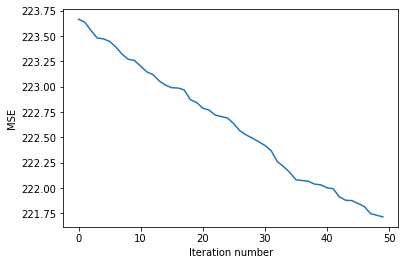

In [101]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

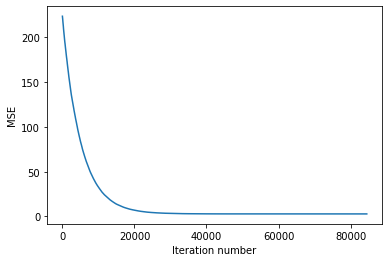

In [102]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

# the algorithm converges

In [28]:
stoch_grad_desc_weights

array([[ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03],
       [ 1.40190566e+01]])

MSE on the last iteration:

In [108]:
stoch_errors_by_iter[-1]

2.7844125884067035